In [ ]:
"""
Modelo de Holling-Tanner com Condições Iniciais FUZZY
=====================================================

Testa apenas cenários com presas e predadores fuzzy
em casos COM e SEM ciclos limite.

Modelo de Holling-Tanner:
    dx/dt = r * x * (1 - x/K) - (a*x*y) / (b + x)
    dy/dt = c * y*(1-d*y/x)
Cenários:
    1. COM ciclos + Presas e Predadores fuzzy
    2. SEM ciclos + Presas e Predadores fuzzy
"""


import numpy as np
import matplotlib.pyplot as plt
import warnings

# Suprimir warnings do scipy
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=RuntimeWarning)


import sys
import os

sys.path.insert(0, os.getcwd())
sys.path.insert(1, os.path.abspath('../..'))

from fuzzy_systems.dynamics.fuzzy_ode import FuzzyODESolver, FuzzyNumber


Automatic parallelization (joblib)


In [11]:
# ============================================================================
# MODELO DE HOLLING-TANNER
# ============================================================================

def holling_tanner_model(t, z, r, K, m, d, a, b):
    """
    Modelo predador-presa de Holling-Tanner.

    Argumentos:
        t: Tempo (não utilizado)
        y: Vetor [x, y] (presa, predador)
        r: Taxa de crescimento da presa
        K: Capacidade suporte da presa
        m: Taxa máxima de predação
        d: Densidade de saturação
        a: Eficiência de conversão
        b: Taxa de mortalidade do predador

    Retorna:
        dy/dt = [dx/dt, dy/dt]
    """
    x, y = z

    # Equações do modelo
    dx_dt = r * x * (1 - x/K) - (m*x*y) / (d + x)
    dy_dt = a * y*(1-b*y/x)

    return np.array([dx_dt, dy_dt])


# ============================================================================
# CONJUNTOS DE PARÂMETROS
# ============================================================================

# Caso 1: SEM ciclos (oscilações persistentes)
params_sem_ciclos = {
    'r': 0.2,
    'K': 100.0,
    'm': 0.03,
    'd': 20.0,
    'a': 0.02,
    'b': 0.155
}

# Caso 2: COM ciclos (equilíbrio estável)
params_com_ciclos = {
    'r': 0.2,
    'K': 100.0,
    'm': 0.03,
    'd': 20.0,
    'a': 0.02,
    'b': 0.12
}


SOLVER MONTE CARLO + PERTINÊNCIA (CORRIGIDO)

⏳ Amostrando 20000 pontos...

  FASE 1: Gerando 20000 amostras por dimensão...
    - CI 0: [35.000, 45.000]
    - CI 1: [240.000, 250.000]

  FASE 2: Combinando amostras com zip()...
    ✓ 20000 pontos do hipercubo

  FASE 3: Adicionando extremos de α=0...
    ✓ 4 combinações de extremos
      = 2^2 × 2^0 = 4 × 1

  FASE 4: Adicionando extremos de α=1.0 (núcleo)...
    ✓ 4 combinações de extremos α=1
      = 2^2 × 2^0 = 4 × 1

  FASE 5: Calculando pertinências...

  RESUMO:
    Total de pontos: 20008
      = 20000 (zip) + 4 (extremos α=0) + 4 (extremos α=1)

    Pertinências: min=0.000, max=1.000, média=0.335
✓ 20008 pontos amostrados (+ vértices)
  Pertinências: min=0.000, max=1.000, média=0.335

⏳ Resolvendo 20008 ODEs...
Automatic parallelization (joblib)Automatic parallelization (joblib)

Automatic parallelization (joblib)
Automatic parallelization (joblib)
✓ 20008 ODEs resolvidas

⏳ Calculando α-níveis...
✓ 20 α-níveis calculados

ESTA

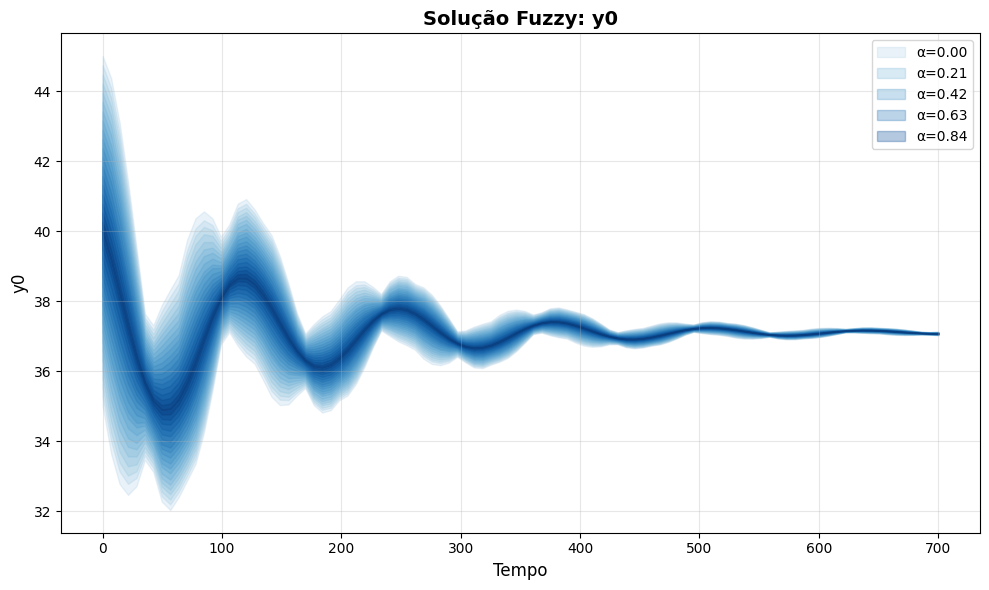

In [ ]:
# ============================================================================
# CENÁRIO 1: SEM CICLOS + CONDIÇÕES INICIAIS FUZZY
# ============================================================================

t_sim = (0, 700)

# Condições iniciais fuzzy
x0_fuzzy = FuzzyNumber.triangular(center=40, spread=5)
y0_fuzzy = FuzzyNumber.triangular(center=245, spread=5)

solver = FuzzyODESolver(
    ode_func=holling_tanner_model,
    t_span=t_sim,
    initial_condition=[x0_fuzzy, y0_fuzzy],
    params=params_sem_ciclos,
    n_alpha_cuts=20,
)

sol = solver.solve(method='monte_carlo',n_samples = 20000,verbose=True)
sol.plot()


SOLVER MONTE CARLO + PERTINÊNCIA (CORRIGIDO)

⏳ Amostrando 20000 pontos...

  FASE 1: Gerando 20000 amostras por dimensão...
    - CI 0: [35.000, 45.000]
    - CI 1: [240.000, 250.000]

  FASE 2: Combinando amostras com zip()...
    ✓ 20000 pontos do hipercubo

  FASE 3: Adicionando extremos de α=0...
    ✓ 4 combinações de extremos
      = 2^2 × 2^0 = 4 × 1

  FASE 4: Adicionando extremos de α=1.0 (núcleo)...
    ✓ 4 combinações de extremos α=1
      = 2^2 × 2^0 = 4 × 1

  FASE 5: Calculando pertinências...

  RESUMO:
    Total de pontos: 20008
      = 20000 (zip) + 4 (extremos α=0) + 4 (extremos α=1)

    Pertinências: min=0.000, max=1.000, média=0.333
✓ 20008 pontos amostrados (+ vértices)
  Pertinências: min=0.000, max=1.000, média=0.333

⏳ Resolvendo 20008 ODEs...
✓ 20008 ODEs resolvidas

⏳ Calculando α-níveis...
✓ 20 α-níveis calculados

ESTATÍSTICAS:
  Total de ODEs resolvidas: 20008
  Vs. método padrão: 1/20 do custo


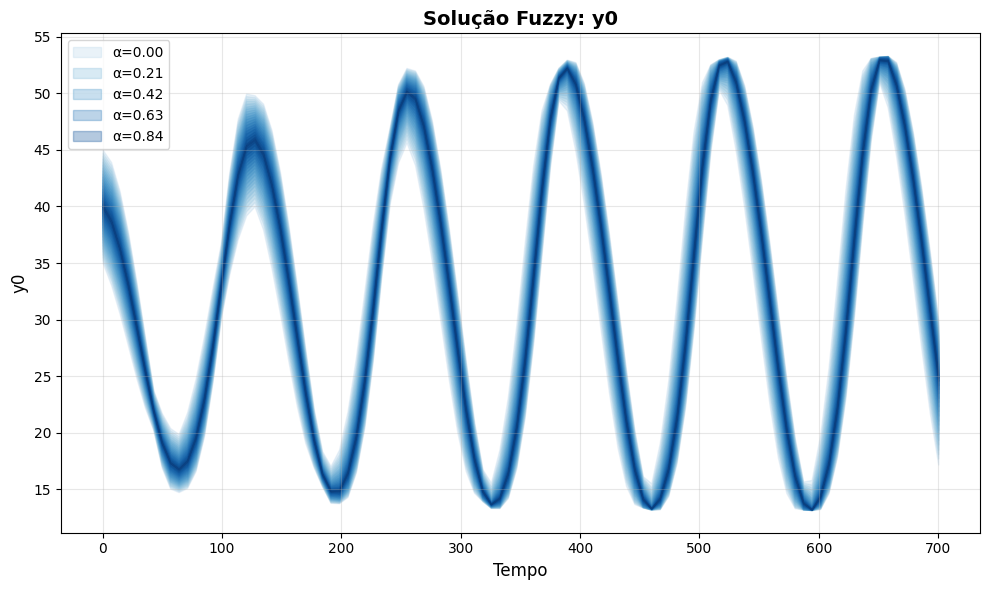

In [19]:
t_sim = (0, 700)

# Condições iniciais fuzzy
x0_fuzzy = FuzzyNumber.triangular(center=40, spread=5)
y0_fuzzy = FuzzyNumber.triangular(center=245, spread=5)

solver = FuzzyODESolver(
    ode_func=holling_tanner_model,
    t_span=t_sim,
    initial_condition=[x0_fuzzy, y0_fuzzy],
    params=params_com_ciclos,
    n_alpha_cuts=20,
)

sol = solver.solve(method='monte_carlo',n_samples = 20000,verbose=True)
sol.plot()